In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ks = pd.read_csv("ks-projects-201801.csv")


In [50]:
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,campaign_length
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55


In [49]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 16 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
campaign_length     378661 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(3), object(6)
memory usage: 46.2+ MB


In [51]:
ks['launched'] = pd.to_datetime(ks['launched'])

In [13]:
ks['deadline'] = pd.to_datetime(ks['deadline'])

In [46]:
ks['campaign_length']= (ks.deadline - ks.launched).astype(str).str.slice(0,2).astype(int)

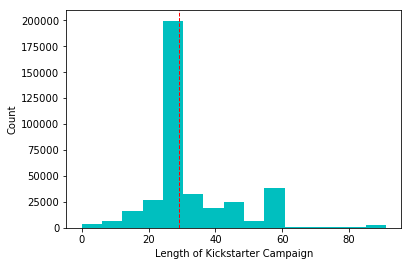

In [59]:
plt.hist(ks.campaign_length, bins = 15, color = 'c')
plt.axvline(ks.campaign_length.median(), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Length of Kickstarter Campaign')
plt.ylabel('Count')
plt.show()

In [146]:
ks.groupby(['main_category']).campaign_length.mean()
ks.groupby(['main_category']).campaign_length.std()
          

main_category
Art             13.338905
Comics          12.142851
Crafts          11.213663
Dance           13.067910
Design          10.897575
Fashion         10.943326
Film & Video    14.433437
Food            12.058595
Games           10.808805
Journalism      14.337122
Music           13.882049
Photography     13.852310
Publishing      12.353095
Technology      11.819242
Theater         14.221852
Name: campaign_length, dtype: float64

In [147]:
ks['season'] = pd.cut(
    (ks.launched.dt.dayofyear + 11) % 366,
    [0, 91, 183, 275, 366],
    labels=['Winter', 'Spring', 'Summer', 'Fall']
)

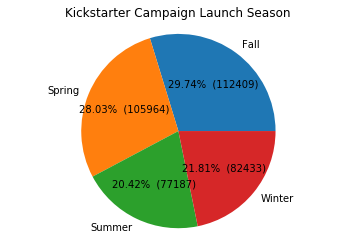

In [205]:
ks.season.value_counts(dropna=True)
values = [92820,98734,100248,86191]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


plt.pie([750,707,515,550], labels = ['Fall','Spring','Summer', 'Winter'], autopct=make_autopct(values), )
plt.axis('equal')
plt.title('Kickstarter Campaign Launch Season')
plt.show()